<a href="https://colab.research.google.com/github/zermurachi/childhood_adult_obesity/blob/main/Analysis_adults_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# prompt: Open the file "obesity_rates_adults.csv" as a dataframe located in my Drive
# https://www-statista-com.eu1.proxy.openathens.net/statistics/1017424/prevalence-of-childhood-obesity-in-france

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/These/data/obesity_rates_adults.csv')
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   year          age_group  obesity_rate
0  1997  18 - 24 years old           2.1
1  2000  18 - 24 years old           2.6
2  2003  18 - 24 years old           2.8
3  2006  18 - 24 years old           3.8
4  2009  18 - 24 years old           4.0


In [21]:
# prompt: Based on df can you add rows for years 2004 and 2010 to guess male and female values. To guess the values you have to compute the slope between the values before and after 2002 and 2008, and infer the new value based on this.

import pandas as pd

# Function to interpolate values for a given year
def interpolate_value(df, year, obesity_rate):
    # Extract years and values for the specified age group
    years = df['year'].values
    values = df[obesity_rate].values
    # Find years before and after the target year
    before_year = years[years < year].max()
    after_year = years[years > year].min()

    before_value = df[obesity_rate][df['year'] == before_year].values[0]
    after_value = df[obesity_rate][df['year'] == after_year].values[0]

    # Calculate the slope
    slope = (after_value - before_value) / (after_year - before_year)

    # Interpolate the value for the target year
    interpolated_value = before_value + slope * (year - before_year)
    return interpolated_value

# Add rows for 2017 2014 2015
new_rows = []
for year in [2017, 2014, 2015]:
  for age_group in df.age_group.unique():
    new_row = {
        'year': year,
        'age_group': age_group,
        'obesity_rate': interpolate_value(df[df['age_group'] == age_group], year, 'obesity_rate'),
    }
    new_rows.append(new_row)

new_df = pd.DataFrame(new_rows)
df = pd.concat([df, new_df], ignore_index=True)

# Sort the DataFrame by year
df = df.sort_values('year')

    year          age_group  obesity_rate
0   2017  18 - 24 years old        7.7750
1   2017  25 - 34 years old       12.6750
2   2017  35 - 44 years old       15.8000
3   2017  45 - 54 years old       17.5000
4   2017  55 - 64 years old       19.4500
5   2017       65 and older       19.3125
6   2014  18 - 24 years old        6.3500
7   2014  25 - 34 years old       11.5500
8   2014  35 - 44 years old       14.9000
9   2014  45 - 54 years old       16.6000
10  2014  55 - 64 years old       19.0000
11  2014       65 and older       19.4250
12  2015  18 - 24 years old        6.8250
13  2015  25 - 34 years old       11.9250
14  2015  35 - 44 years old       15.2000
15  2015  45 - 54 years old       16.9000
16  2015  55 - 64 years old       19.1500
17  2015       65 and older       19.3875


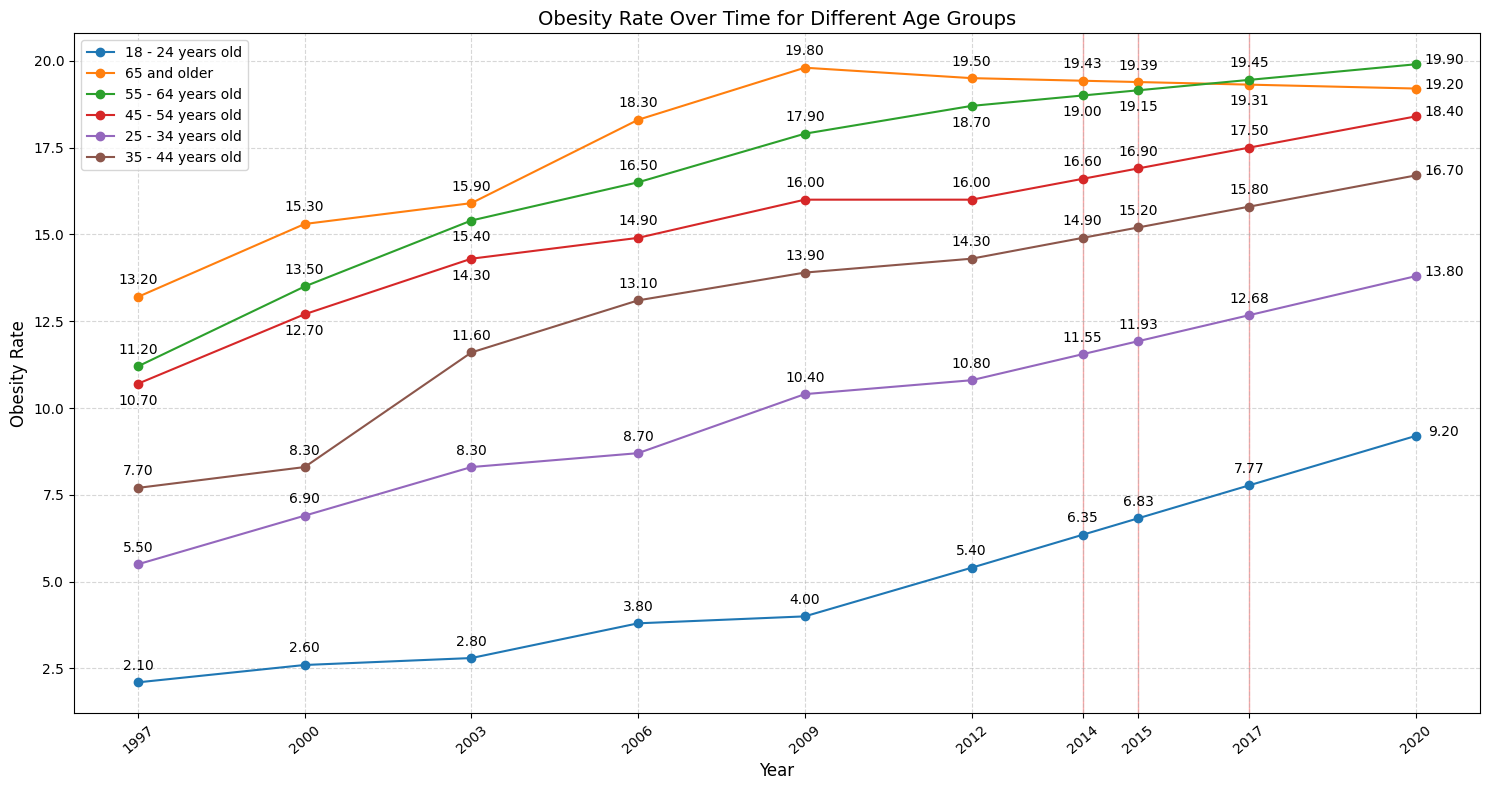

In [71]:
# prompt: Based on df, can you represent the obesity rate over year for each age group on different small graphs. make it as one graph include the year 2014, 2015 and 2017 as they are important. Represent on the graph a dot for each years we have and display the values. incline the labels on the x axis so they do not overlap

import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(15, 8))

# Iterate through each age group
for age_group in df['age_group'].unique():
    # Filter data for the current age group
    age_group_data = df[df['age_group'] == age_group]

    # Plot the data points
    plt.plot(age_group_data['year'], age_group_data['obesity_rate'], marker='o', label=age_group)

    # Annotate the data points with their values
    for index, row in age_group_data.iterrows():
        if row['year'] == 2020:
          plt.annotate(f"{row['obesity_rate']:.2f}", (row['year'], row['obesity_rate']), textcoords="offset points", xytext=(20,0), ha='center')
        elif (row['year'] in [2012, 2015, 2014, 2003] and row['age_group'] == '55 - 64 years old'):
          plt.annotate(f"{row['obesity_rate']:.2f}", (row['year'], row['obesity_rate']), textcoords="offset points", xytext=(0,-15), ha='center')
        elif (row['year'] in [1997, 2000, 2003] and row['age_group'] == '45 - 54 years old'):
          plt.annotate(f"{row['obesity_rate']:.2f}", (row['year'], row['obesity_rate']), textcoords="offset points", xytext=(0,-15), ha='center')
        elif (row['year'] == 2017 and row['age_group'] == '65 and older'):
          plt.annotate(f"{row['obesity_rate']:.2f}", (row['year'], row['obesity_rate']), textcoords="offset points", xytext=(0,-15), ha='center')
        else:
          plt.annotate(f"{row['obesity_rate']:.2f}", (row['year'], row['obesity_rate']), textcoords="offset points", xytext=(0,9), ha='center')

plt.axvspan(2014, 2014, color='red', alpha=0.35)
plt.axvspan(2015, 2015, color='red', alpha=0.35)
plt.axvspan(2017, 2017, color='red', alpha=0.35)

# Customize the plot
plt.xlabel('Year', fontsize=12)
plt.ylabel('Obesity Rate', fontsize=12)
plt.title('Obesity Rate Over Time for Different Age Groups', fontsize=14)
plt.xticks([1997, 2000, 2003, 2006, 2009, 2012, 2020, 2014, 2015, 2017], rotation=40)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


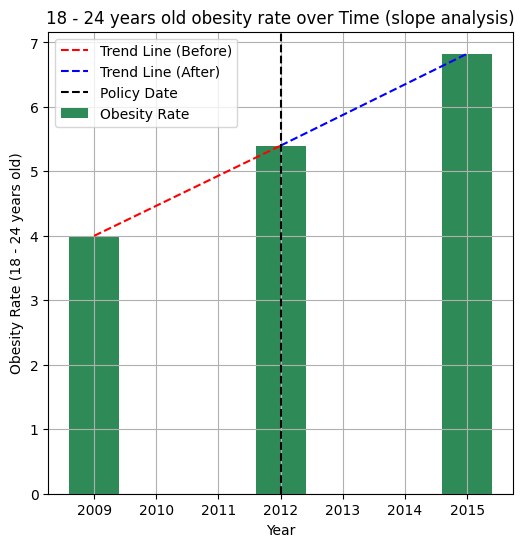

Slope before policy: 0.47
Slope after policy: 0.48


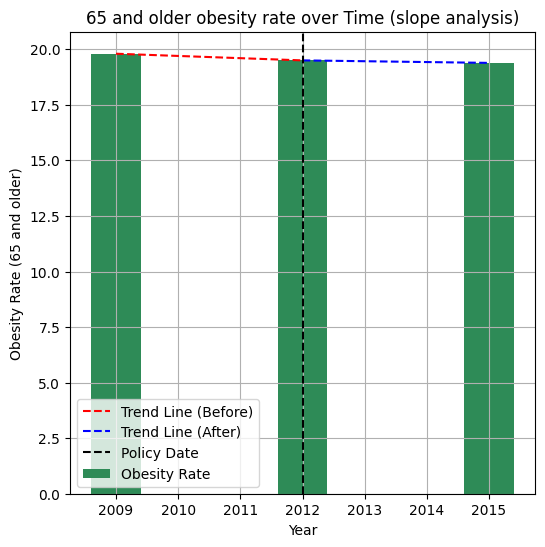

Slope before policy: -0.10
Slope after policy: -0.04


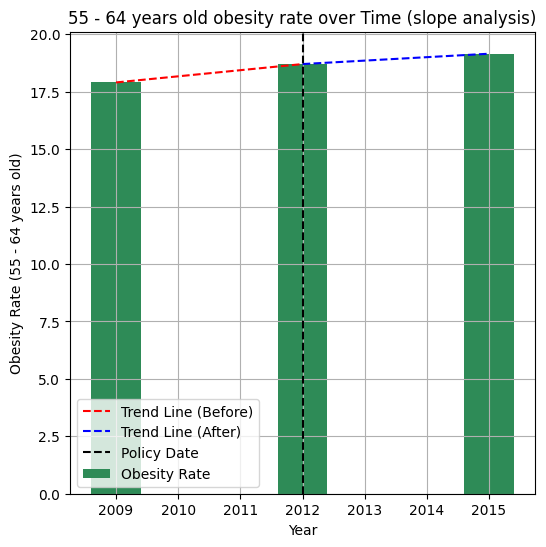

Slope before policy: 0.27
Slope after policy: 0.15


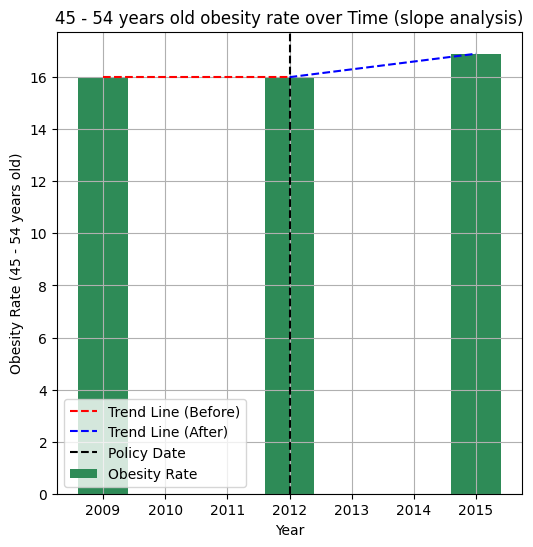

Slope before policy: 0.00
Slope after policy: 0.30


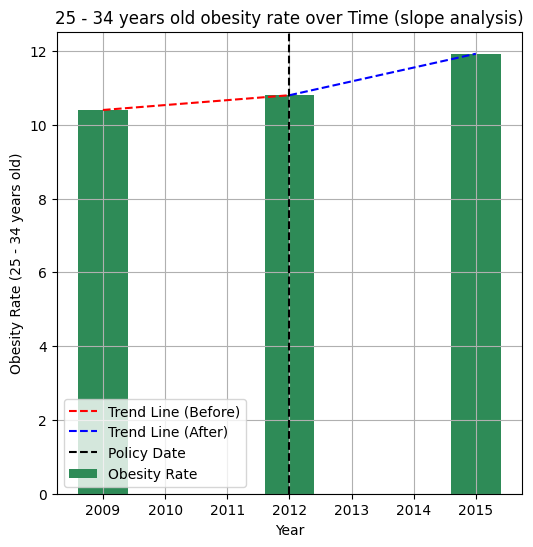

Slope before policy: 0.13
Slope after policy: 0.38


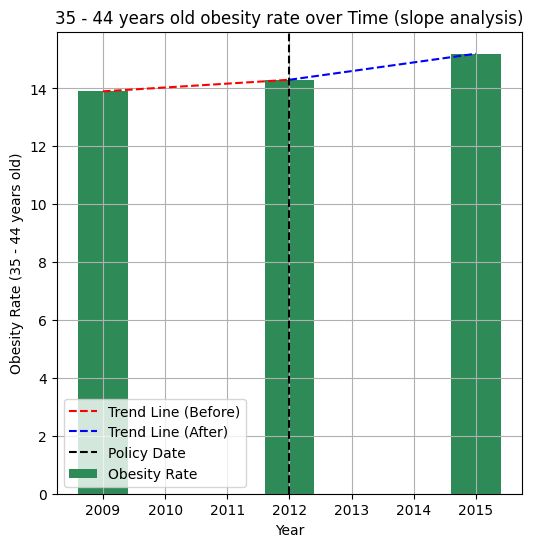

Slope before policy: 0.13
Slope after policy: 0.30


In [88]:
# prompt: Based on the dataframe that we have, do a slope analysis based on a policy in date of 2007 and analyze 3 years before and after it. Display results in a graph of your choice
import numpy as np

# Assuming df is already loaded as in the previous code
policy_date = 2012
years_before = 3
years_after = 3

for age_group in df['age_group'].unique():
  # Filter the data for the relevant period
  start_year = policy_date - years_before
  end_year = policy_date + years_after
  df_filtered = df[(df['age_group'] == age_group) & ((df['year'] == policy_date) | (df['year'] == policy_date - years_before) | (df['year'] == policy_date + years_after))]

  # Create a figure and an axes
  fig, ax = plt.subplots(figsize=(6, 6))

  # Plot the Obesity_Rate_Female over Year with a bar chart
  ax.bar(df_filtered['year'], df_filtered['obesity_rate'], color='seagreen', label='Obesity Rate')

  # Calculate and plot the linear regression line (slope) before the policy
  df_before = df_filtered[df_filtered['year'] <= policy_date]
  z_before = np.polyfit(df_before['year'], df_before['obesity_rate'], 1)
  p_before = np.poly1d(z_before)
  ax.plot(df_before['year'], p_before(df_before['year']), "r--", label='Trend Line (Before)')

  # Calculate and plot the linear regression line (slope) after the policy
  df_after = df_filtered[df_filtered['year'] >= policy_date]
  z_after = np.polyfit(df_after['year'], df_after['obesity_rate'], 1)
  p_after = np.poly1d(z_after)
  ax.plot(df_after['year'], p_after(df_after['year']), "b--", label='Trend Line (After)')

  # Add a vertical line to indicate the policy date
  ax.axvline(x=policy_date, color='black', linestyle='--', label='Policy Date')

  # Customize the plot
  ax.set_xlabel('Year')
  ax.set_ylabel(f'Obesity Rate ({age_group})')
  ax.set_title(f'{age_group} obesity rate over Time (slope analysis)')
  ax.legend()
  ax.grid(True)

  # Show the plot
  plt.show()

  # Print the slope values
  print(f"Slope before policy: {z_before[0]:.2f}")
  print(f"Slope after policy: {z_after[0]:.2f}")
